In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [23]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


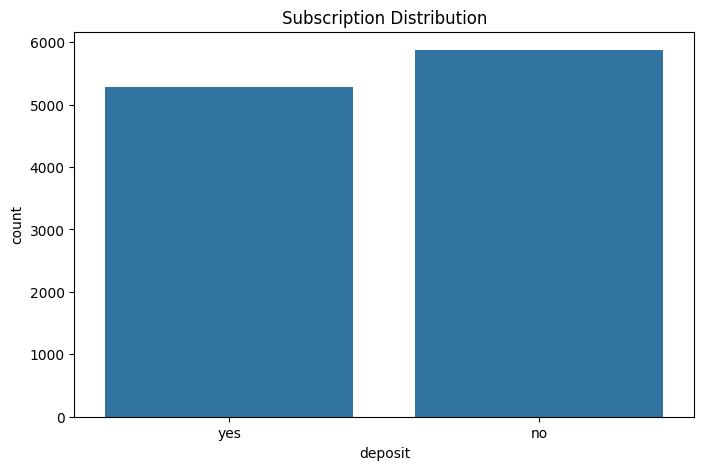

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [24]:
# target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='deposit', data=df)
plt.title("Subscription Distribution")
plt.show()

df['deposit'].value_counts()

In [25]:
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [26]:
df['marital'].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

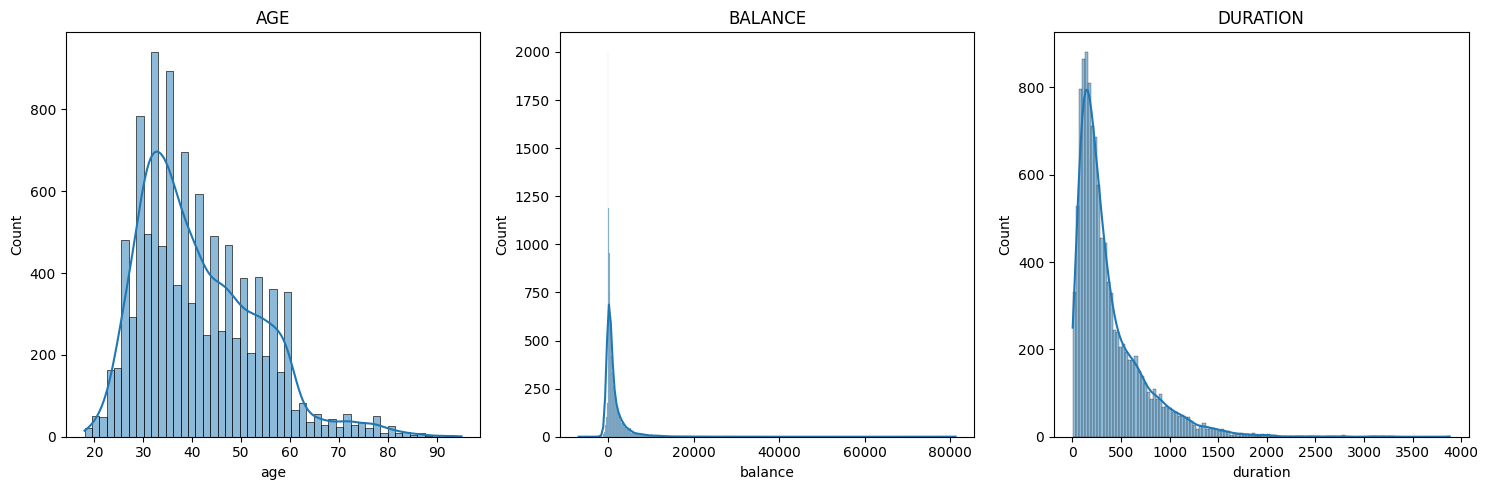

In [27]:
# Numerical features analysis
num_features = ['age', 'balance', 'duration']
plt.figure(figsize=(15,5))
for i, col in enumerate(num_features, 1):
    plt.subplot(1,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(col.upper())
plt.tight_layout()
plt.show()

Data Cleaning

In [28]:
# handle null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [29]:
# duplicates
df.duplicated().sum()

np.int64(0)

Encoding

In [30]:
binary_cols = ['default', 'housing', 'loan', 'deposit']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})
df[binary_cols].head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_18840\4130988532.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


,default,housing,loan,deposit
0,0,1,0,1
1,0,0,0,1
2,0,1,0,1
3,0,1,0,1
4,0,0,0,1


In [31]:
# Ensure proper data types
df['month'] = df['month'].str.lower().str.strip()  # Clean month names

Data Preprocessing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define feature sets
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

In [33]:
# Split data
X = df.drop('deposit', axis=1)
y = df['deposit']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Apply preprocessing
X_train = preprocessor.fit_transform(X_train).astype('float32')
X_test = preprocessor.transform(X_test).astype('float32')

In [36]:
# Verify final shapes and types
print(f"\nProcessed Training Data: {X_train.shape}, {X_train.dtype}")
print(f"Processed Test Data: {X_test.shape}, {X_test.dtype}")


Processed Training Data: (8929, 45), float32
Processed Test Data: (2233, 45), float32


Neural Network Construction

In [37]:
# Convert target to float32
y_train = y_train.astype('float32').values
y_test = y_test.astype('float32').values

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

Model Training

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, 
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - Precision: 0.6230 - Recall: 0.4382 - accuracy: 0.6356 - loss: 0.6343 - val_Precision: 0.7884 - val_Recall: 0.8282 - val_accuracy: 0.8124 - val_loss: 0.4169
Epoch 2/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Precision: 0.7944 - Recall: 0.8020 - accuracy: 0.8090 - loss: 0.4289 - val_Precision: 0.7826 - val_Recall: 0.8765 - val_accuracy: 0.8253 - val_loss: 0.3996
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Precision: 0.7920 - Recall: 0.8298 - accuracy: 0.8188 - loss: 0.4118 - val_Precision: 0.7926 - val_Recall: 0.8765 - val_accuracy: 0.8320 - val_loss: 0.3857
Epoch 4/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Precision: 0.8059 - Recall: 0.8502 - accuracy: 0.8320 - loss: 0.3895 - val_Precision: 0.7895 - val_Recall: 0.8871 - val_accuracy: 0.8337 - val_loss: 0.3812
Epoch 5/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Precision: 0.8026 - Recall: 0.8679 - accuracy: 0.8394 - loss: 0.3794 - val_Precision: 0.8004 - val_R

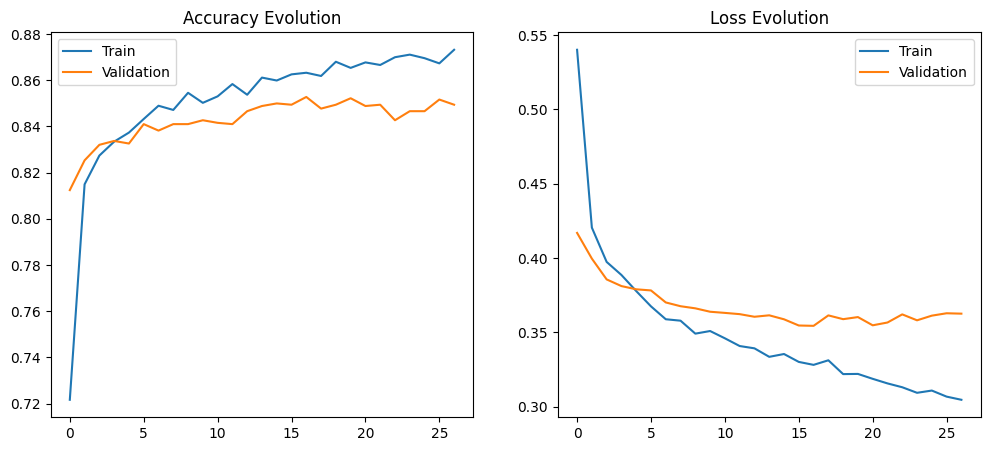

In [41]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Evolution')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      1166
         1.0       0.79      0.89      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



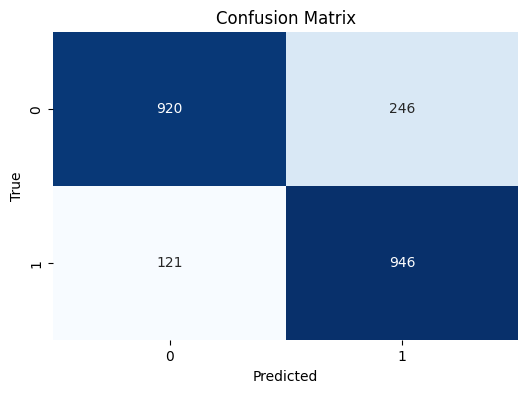

In [44]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', 
            cmap='Blues',
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A total of `1866` predictions were correct out 2233 total predictions